In [1]:
import eda_tools as eda
import numpy as np

def c_n_m(n, m):
    return np.math.factorial(n) / (np.math.factorial(n - m) * np.math.factorial(m))

#### Полезные ссылки

- Ace of data interview - data science book
- https://github.com/sinclam2/fifty-challenging-problems-in-probability/blob/master/01-Solution.ipynb
- https://www.nicksingh.com/posts/40-probability-statistics-data-science-interview-questions-asked-by-fang-wall-street
- примеры задач компаний из check-папки

#### Полезные инсайты - tips

<u>Вероятность какого события спрашивают?</u>  
Часто ошибаюсь с вероятностью конкретного исхода которую запрашивают в задаче. Например есть два игрока,  
спрашивают вероятность победы ПЕРВОГО игрока. После решения дополнительно синкать что найденное совпадает с запрошенным

---
<u>Биномиальные или др вариационные коэффициенты</u>  
При расчете кол-ва конфигураций вероятностного пр-ва проверять могут ли варьироваться разные части дроби  
Например в знаменателе может быть C_n_k если возможны много исходов  

Вообще не забывать про потенциальное биномиальное распределение.  
Так, если бы в задаче "вероятность что из 10 бросков монеты выпало 2 орла" считали бы p^2*(1-p)^8, то  
такая вероятность была бы эквивалентна событию "шанс что первые два броска орел, остальные решки, что неверно.  

Если в задаче извлечение **с возвращением** - то часто возможны биномиальные тенденции.  
Вероятности составных элементов событий независимы друг от друга.  

А если без возвращения из конечной выборки - то разные условные распределения.
Пример - гипергеометрическое распределение
  
PS. Допустим считаем кол-во конфигураций приводящих к X совпадениям и домножаем  
на остаточную вариацию остальных элементов выборки. Учитывать что там также могут быть  
экстра совпадения, а значит нельзя просто варьировать по всем перестановкам

---
<u>Симметрия</u>  
Обращать внимание на возможность симметрии - мб это упростит решение задачи  

Когда используется геометрический подход к определению вероятностей особенное внимание уделять  
симметрии расширяемых на бесконечность фигур (например квадрата или круга) 

---
<u>Формула полной вероятности</u>  
В ряде задач в том числе с непрерывным континуумом конфигураций полезна формула  
P(A) = P(A|B1)P(B1) + ... + P(A|Bn)P(Bn)  
При n -> inf она переходит в интеграл с условной плотностью вероятности.  

При оценке среднего СВ смотреть на возможность применить **теорему о среднем**. x_avg = sum(xi * pi),  
где xi - реализация некоторого значения, pi - вероятность данного значения  
в общем виде pi считается сложно - так как есть условная вероятность от конфигурации xj при i < j  
но для среднего sum(xi * pi) = sum(xi * pi_full) по теореме о полной вероятности
  
PS. Теорема о среднем  
пусть p(xi) - вероятность посадки на i-м месте (до этого люди как то уже сели)  
xi_avg = xi * p(xi|prev1) * p(prev1) + ... xi * p(xi | prevk) * p(prevk)  
ср значение xi - взвешено по всем вероятностям наступления xi при условии пред конфигураций посадки prev  
Но тогда xi_avg = xi * sum(p(xi|prevk)p(prevk)) = xi * p(xi) по формуле полной вероятности  
Пред. конфигурации складываются в независимую безусловную вероятность наступления xi
  
---
<u>Рекурсия</u>  

Возможность рекурсивного подхода, когда система через N шагов возвращается в исходное состояние.  
Например, найти вероятность выигрыша в монетку в игре "до первого орла" двух игроков.  
если первый проиграет, затем второй - то вернутся к начальному состоянию -> возможны рекурсивные соотношения  
  
Полезно в задачах с Марковскими цепями с поглощением и в задачах на эволюцию систем

#### 50 prob challenging problems

In [ ]:
# https://github.com/sinclam2/fifty-challenging-problems-in-probability/tree/master

dist sum  0.9998681382170593
avg N untill success  5.9927476019382695


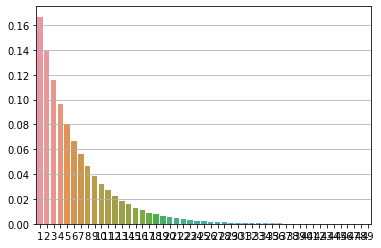

In [23]:
# # Задача 3 
# сколько в ср раз кинуть кубик пока не выпадет 6 - аналог распределения бернулли
p, q = 1/6, 5/6
x = list(range(1, 50))
dist = []
for j in x:
    dist.append(p * q**(j-1))
print('dist sum ', sum(dist))
print('avg N untill success ', np.sum(np.array(x) * np.array(dist)))
print('чтобы суммировать аналитичически достаточно вспомить что 1/(1-x) производная даст нужный ряд')
eda.make_plot('bar', {'x' : x, 'y' : dist})

In [14]:
# Задача 10
# У вашего друга есть много чёрных и белых шаров, и он кладёт в урну чёрные и белые шары по своему усмотрению. 
# Вы выбираете «чёрный» или «белый». Из урны случайно вытаскивается один шар. 
# Запишите максимальную сумму, которую вы готовы заплатить за участие в этой игре. 
# Игра проводится только один раз.

print(
"""
p(w) = 2 * p(белый) * p = p (из за симметрии, домножаем на 2 для кейса с черным выбором) 
p = sum(p(вытащить белый из N когда X белых) * p(друг запланировал X белых) * p(друг запланировал N шаров))  
p = sum(x/N * 1/(N+1)) суммируем по N = 1, inf; x = 0, N (поэтому n+1 вариант для каждого N)
"""
)

p = 0
Max_N = 1000 # с ростом выходим на насыщение
for N in range(1, Max_N): # число шаров в корзине
    for x in range(0, N+1): # число белых шаров
        p += x/N * 1/(N+1) * 1/Max_N # тотал шанс угадать белый шар
print('res', p)

# или еще проще - здесь полная симметрия, а значит нет преимуществ выбора белого/черного. p = 1/2
# чуть сложнее - пусть СВ f_b - доля выбора черных шаров. тогда доля белых 1 - f_b
# p(win) = p(black) * f_b + p(white) * (1-f_b) = 1/2, т к p(white) = p(black) = 1/2

res 0.4995000000000076


In [9]:
# Задача 14
# Купоны в коробках с хлопьями пронумерованы от 1 до 5, и для получения приза 
# нужно собрать по одному экземпляру каждого номера.В каждой коробке — один купон. 
# Сколько коробок в среднем нужно купить, чтобы собрать полный набор?

# если я купил x коробок, то шанс что соберу 1-5 купонов: p = 1 * 1/(x-1) * ... 1/(x-4)
# тогда <x> = sum(x * p), x = (5, inf)  
x_max = 1000
p = 0
for x in range(5, x_max+1):
    p += x / ((x-1) * (x-2) * (x-3) * (x-4))
print(p / 0.05555555522021383)

5.499990981991038


In [ ]:
# Задача 15
# Восемь подходящих женихов и семь красивых моделей случайно купили одиночные билеты 
# в один и тот же 15-местный ряд театра. 
# В среднем, сколько пар соседних мест окажутся заняты "брачными парами"?

Итак, у нас 15 мест, а значит 14 пар мест которые друг рядом с другом. Пусть хi - это состояние i-пары.  
Если xi=1 то там есть матч, если xi=0 то нет.  Тогда cnt = x1 + ... + x14 - случайное число матчей.  
(!) вероятность матча xi не зависит от других j!=i (у нас НЕТ условия на то как они распределены)  
Поэтому для любого i: xi_avg = 1 * (7/14 * 8/15 + 8/14 * 7/15) = 8/15  
Тогда cnt_avg = 14 * xi_avg = 8 * 14 / 15 ~ 7.4  
См. TIPS - теорема о среднем

In [11]:
# Задача 19 
# что более вероятно: >=одной 6 на 6 бросках кости, >=двух на 12, >=трех на 18
# сумма биномиальных распределений
def prob_calc(m, n):
    # m - число шестерок, n - число бросков
    prob = 0
    for j in range(m, n+1):
        p = 1/6
        q = 1-p
        c = np.math.factorial(n) / (np.math.factorial(n - j) * np.math.factorial(j))
        prob += c * (p**j) * (q**(n-j))
    return prob

prob_calc(1, 6), prob_calc(2, 12), prob_calc(3, 18)

(0.6651020233196161, 0.618667373732309, 0.5973456859477233)

In [6]:
# Задача 22
# Есть урна голосования, в ней a+b билютеней, a>b за некоторого кандидата
# Начинаем последовательно доставать из нее билеты и считать - какова вероятность что в какой то момент они сравн?

Решение хитрое:
1) Если выборка началась с шара b - то в ней наступит такое равенство, так как рано или
поздно шаров a должно стать больше (значит balance_cnt пройдет через ноль)  
2) Кроме того у каждой выборки начатой с b - есть зеркальная выборка начатая с a, но где заменены a <-> b.  
3) Больше видов выборок ведущих к равенству нет, так как если выборка ведет к равенству, значит в ней есть  
равное число a и b элементов - и если не начинается с b, то для нее можно найти двойника-начинающегося с b.  
А это значит что она в классе 2

Доля выборок типа 1: b/(a+b)  
Доля выборок типа 1 и 2 (все ведущие к равенству) - 2b/(a+b) 

1.2

In [ ]:
# Задача 34
# Трудовые законы в Эревоне обязывают владельцев фабрик давать выходной всем работникам каждый раз, 
# когда у кого-то из них день рождения, и нанимать работников без учёта даты рождения. 
# За исключением этих выходных, они работают 365 дней в году.
# Владельцы хотят максимизировать ожидаемое общее число человеко-дней работы в год. 
# Сколько работников нанимают фабрики в Эревоне?

Решение:
Всего у нас 365 дней, пусть вероятность что день 1 рабочий будет p1. Вероятность что рабочий день X:
px = p(1|prev), где prev - предыдущая конфигурация дней (условая вероятность)  
Ср число рабочих дней cnt_avg = sum(1 * p_i) = sum(p_i)  
Из за свойства сумм + формулы полной вероятности все условные вероятности складываются и cnt_avg  
становится суммой безусловных вероятностей всех дней -> cnt_avg = 365 * p1.  
p1 = (1 - 1/365)**N - вероятность что день 1 (и любой другой - безусловно) рабочий  
Получаем что общее число человеко-дней Q = N * 365 * (1 - 1/365)**N -> max  
  
Если продиф и найти экстремум - то dQ/dN = 0 -> N = 1 / ln(365/364) = 364

In [4]:
# задача 45/46
# Из перетасованной колоды карты выкладываются на стол по одной, лицом вверх, слева направо. 
# Затем вторая колода выкладывается так, что каждая её карта оказывается под соответствующей картой первой колоды. 
# Каково среднее число совпадений карты сверху и карты снизу при многократном повторении этого эксперимента?

(!) Ошибочное решение:
пусть выложили первую колоду (n=52). Теперь выкладываем вторую поверх - получаем k совпадений.  
Кол-во случаев наблюдать k совпадений: C_n_k. Кол-во способов вообще выложить вторую колоду P(n) = n!  
Кол-во способов выложить остальные не совпадающие карты на оставшиеся n-k позиций:  
Это значение НЕ РАВНО P(n-k) - так как тогда учтем дополнительные совпадения.  
Кол-во перестановок без совпадений D(n-k) < P(n-k) и считается сложнее. 
Итого вероятность получить k совпадений: prob(k) = C_n_k * D(n-k) / P(n)  
    
Корректное решение: 
Полная (она же безусловная) вероятность получить совпадение на i-й позиции равна 1/52.  
По свойству матожидания: x_avg = sum(xi * pi) = sum(xi * pi_full), так как pi_full = sum(pi * p_other)  
(теорема о полной вероятности) -> x_avg = 1/52 * 52 = 1  

Вероятность же получить ровно k совпадений считается через:  
prob(k) = C_n_k * D(n-k) / P(n)  
D(n-k) = кол-во перестановок без совпадений = P(n-k) - Q(n-k)  
Q = кол-во перестановок с совпадениями = Q1 + Q2 + ...
Q = sum(C_n-k_i * D(n-k-i)) -> получаем рекурсивную формулу для D.  
Она сойдется к знакопеременному ряду. Его же можно получить по принципу объединения N множеств.

In [ ]:
# Задача 48 
# Игроку предлагается по очереди открывать карточки (всего их N = 100, значения на карточках уникальные, карточки  
# лежат рандомно) и в какой то момент остановиться на самом большом значении. Какую надо использовать стратегию?  

Присвоим карточкам ранги 1 ... 100. Если выбрать первую же карточку, шанс победы p = 1/100  
Предположим что стратегия - пропустить k карточек (перевернуть их) и далее начать открывать следующие  
и остановиться на той которая больше MAX(первые k карточек).  
Шанс выиграть тогда:  
sum(prob(max на позиции i>k, среди i-1 карточек локальный максимум в первых k))
здесь суммирование идет по всем i позициям >k. это включает условие что тотал максимум не в первых k позициях. 
Для некоторой позиции i>k слагаемое равно:  
prob_i = 1/N (шанс что на позиции i) * k/(i-1) (лок максимум в первых k из i-1)  
Если это суммировать по i и затем найти k максимизирующий вероятность то получится k=int(N/e)

#### Ace Data Science interview

In [ ]:
# задача 5-3
# кидается один за другим три раза игральные кости - найти вероятность что выпадут строго возрастающие номера
Пусть при броске выпали номера a1, a2, a3  
Всего вариантов выпадения N = 6 * 6 * 6 = 216
Всего комбинаций когда выпали разные цифры (не одинаковые) = 6 * 5 * 4 = 120  
Уникальный набор цифр создает 3! = 6 перестановок-комбинаций -> всего есть 120/6 = 20 уникальных наборов цифр  
Из них только 1 комбнация - возврастающая, значит всего 20 возможных комбинаций -> P = 20/216

In [ ]:
# задача 5-8
# два игрока кидают монетку по очереди - шанс что выпадет орел = p (монетка смещенная)  
# начинает игрок А, первый кто выкинет орла - выигрывает. Какой шанс что победит игрок А?  
Решение через рекурсию, так как возвращаемся в исходное пространство  
P(A_win) = p + (1-p)*(1-p) * P(A_win) -> первое слагаемое - шанс что первый выиграет сразу, второе -  
сначала проиграет, потом проиграет второй и вернутся к начальному положению дел. 
Отсюда P(A_win) = 1/(2-p)

In [ ]:
# задача 5-10
# кидаются случайно две хорды на круг - какой шанс что пересекутся
Вариант 1: пусть первую хорду случайно кинули - она отсекла меньший сектор alpha, второй соотв 2pi - alpha.  
Шанс что вторая пересечет первую = шанс что две ее точки упадут в разные сегменты -> alpha/2pi * (2pi-alpha)/2pi  
Вероятность что первая хорда отсекла данный угол p1 = d_alpha / 2pi - бесконечно малая  
По формуле полной вероятности p_intersect = integral(alpha/2pi * (2pi-alpha)/2pi * d_alpha / 2pi) -> 1/3  
  
Вариант 2: давайте представим что края первой хорды это 0, а второй 1 в последовательности (1 1 0 0) на круге.  
Чтобы пересеклись - необходимо чредование, то есть 1 0 1 0 и 0 1 0 1 - два варианта.  
А всего способов разместить две единицы по 4 позициям = C_4_2 = 6 -> P_inersect = 2 / 6 = 1 / 3

In [ ]:
# задача 5-14
# у родителей два ребенка, один из них мальчик. Какая вероятность что второй - тоже мальчик  
Варианты: BG, GB, BB, GG - первые три подходят под начальное условие. Из них только одна конфигурация BB целевая.  
Значит вероятность P(BB) = 1/3

In [2]:
# задача 5-18
# кидают одновременно 10 кубиков - какая вероятность что полученная сумма делится на 6?
Пусть кинули уже 9 кубиков и на них получилась какая то сумма X.  
Для этой суммы очевино X%6 = 0, 1, 2, 3, 4, 5 (остаток от деления)  
В любом из этих случаев существует только одно значение на кубике 10, чтобы итоговая сумма делилась на 6.  
Например при X%6 = 1 - должно выпасть 5, 2 - 4 итд.  
Таким образом при любом раскладе, вероятность того что сумма кратна 6: 1/6.  

In [10]:
# задача 5-30
# кидают одновременно n кубиков - какая вероятность что MAX(значений) = r?; r = 1, ... 6
n = 7; r = 2

# биномиальное решение 
# Prob = P(один кубик = r, другие < r) + P(два кубика = r, другие < r) + ...
res = 0
for j in range(1, n+1):
    res += c_n_m(n, j) * ((1/6)**j) * (((r-1)/6)**(n - j))
print(res)

# более элегантное решение через рекурсию
# Br = вероятность что все кубики <r; Ar = вероятность что максимум кубиков = r (искомая)
# Br = Ar + B(r-1) -> Ar = Br - B(r-1) = (r/6)^n - ((r-1)/6)^n
print((r/6)**(n) - (r-1)**n / (6**n))

0.0004536751257430268
0.0004536751257430268
